# Preprocessing and Analysis

## Preprocessing

In [21]:
# imports
import numpy as np
from keras.datasets import mnist
import pandas as pd
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scikeras.wrappers import KerasClassifier
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
# load in the dataset from Keras
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# concatenating the training and test data
X_combined = np.concatenate((X_train, X_test), axis=0)  
y_combined = np.concatenate((y_train, y_test), axis=0)


In [25]:
# Flatten each image to 1D array of 784 pixels
X_flat = X_combined.reshape(X_combined.shape[0], -1)  # shape: (70000, 784)

# Convert to pandas DataFrame
X_df = pd.DataFrame(X_flat, columns=[f"pixel_{i}" for i in range(X_flat.shape[1])])

# Optionally add the label as a column
X_df['label'] = y_combined

X_df['label'] = X_df['label'].astype(str)

X_df.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


## Random Forest Analysis

Cross-validation accuracy scores: [0.96885714 0.96771429 0.96614286 0.96528571 0.97064286]
Mean accuracy: 0.9677


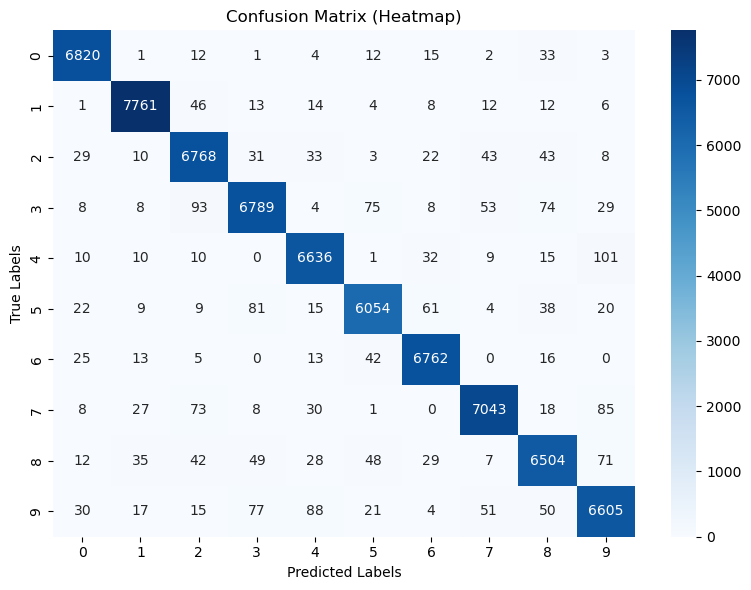

In [27]:
X = X_df.drop('label', axis=1)
y = X_df["label"]

# Define a pipeline with StandardScaler and a classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale features 
    ('classifier', RandomForestClassifier())
])

# Perform cross-validation
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')

# Print results
print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean accuracy: {np.mean(cv_scores):.4f}")

y_pred = cross_val_predict(pipeline, X, y, cv=5)

# Create confusion matrix
cm = confusion_matrix(y, y_pred)
labels = np.unique(y)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Heatmap)")
plt.tight_layout()
plt.show()

## LDA (Linear Discriminant Analysis)

Cross-validation accuracy scores: [0.86471429 0.86385714 0.85771429 0.86278571 0.87814286]
Mean accuracy: 0.8654


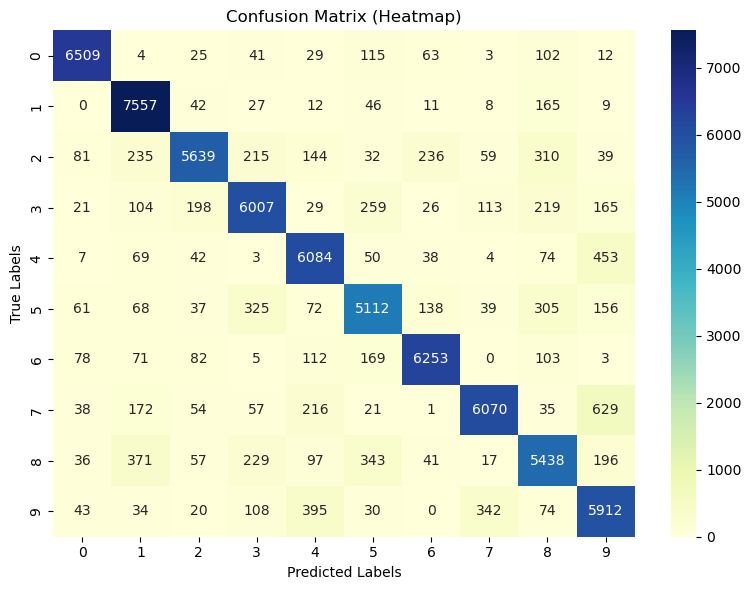

In [28]:
# Define X and y correctly
X = X_df.drop('label', axis=1)
y = X_df["label"]

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LinearDiscriminantAnalysis())
])

# Perform cross-validation
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')

print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean accuracy: {np.mean(cv_scores):.4f}")

# Get cross-validated predictions using the same pipeline
y_pred = cross_val_predict(pipeline, X, y, cv=5)

# Compute confusion matrix
cm = confusion_matrix(y, y_pred)
labels = np.unique(y)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Heatmap)")
plt.tight_layout()
plt.show()

## NN (Neural Network)

Cross-validation accuracy scores: [0.96471429 0.96821429 0.96635714 0.96414286 0.97135714]
Mean accuracy: 0.9670


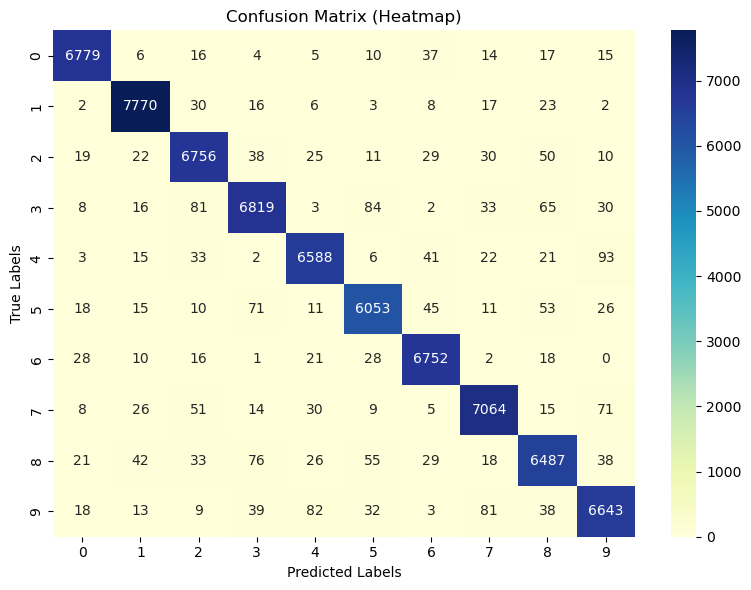

In [29]:
# Define X and y
X = X_df.drop("label", axis=1)
y = X_df["label"]

# Basic neural network (logistic regression equivalent)
def build_simple_nn():
    model = keras.Sequential([
        layers.Input(shape=(784,)),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')  # 10 classes for digits 0–9
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Wrap the model for scikit-learn pipeline
nn_classifier = KerasClassifier(model=build_simple_nn, epochs=8, batch_size=64, verbose=0)

# Pipeline with scaling and neural net
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', nn_classifier)
])

# Cross-validation (smaller cv for speed)
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')

print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean accuracy: {np.mean(cv_scores):.4f}")

# Get predicted labels via cross-validation
y_pred = cross_val_predict(pipeline, X, y, cv=5)

# Compute confusion matrix
cm = confusion_matrix(y, y_pred)
labels = np.unique(y)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Heatmap)")
plt.tight_layout()
plt.show()